# **Libraries and Google Drive**

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import sklearn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Machine Learning/Assignment 1/Q2 dataset

/content/drive/MyDrive/Machine Learning/Assignment 1/Q2 dataset


# **Dataset & Preprocessing**

In [4]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df
df_dont_change = df

In [5]:
df.shape

(13611, 17)

In [6]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
# df = df.drop_duplicates(subset ="Class",)

In [9]:
df_num = df.copy(deep=True)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_num .Class)
df_num ['Class'] = le.transform(df_num .Class)
df_num 

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

       Class  
0          5  
1          5  
2          5  
3          5  
4          5  
...      ...  
13606      3  
13607      3  
13608      3  
13609      3  
13610      3  

[13611 rows x 17 columns]

In [10]:
(df_num < 0).sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [11]:
xd = df_num.iloc[:,0:16]
yd = df_num.iloc[:,16:]

# **Part a**

**Analysis** - 

When y increases as x increases we say that two features are strongly correlated. Some strongly related features are - 
1.   Area & Perimeter
2.   Area & Convex area
3.   Area & Equidiameter
4.   Compactness & Shapefactor3
5.   Equidiamete & Convex area etc.

When y decreases as x increases we say that two features are negatively correlated. Some negatively related features are -

1.   Shapefactor1 & Area
2.   Shapefactor1 & Perimeter
3.   Shapefactor1 & MajorAxis
4.   Shapefactor1 & Convex Area
5.   Shapefactor3 & Aspectratio etc

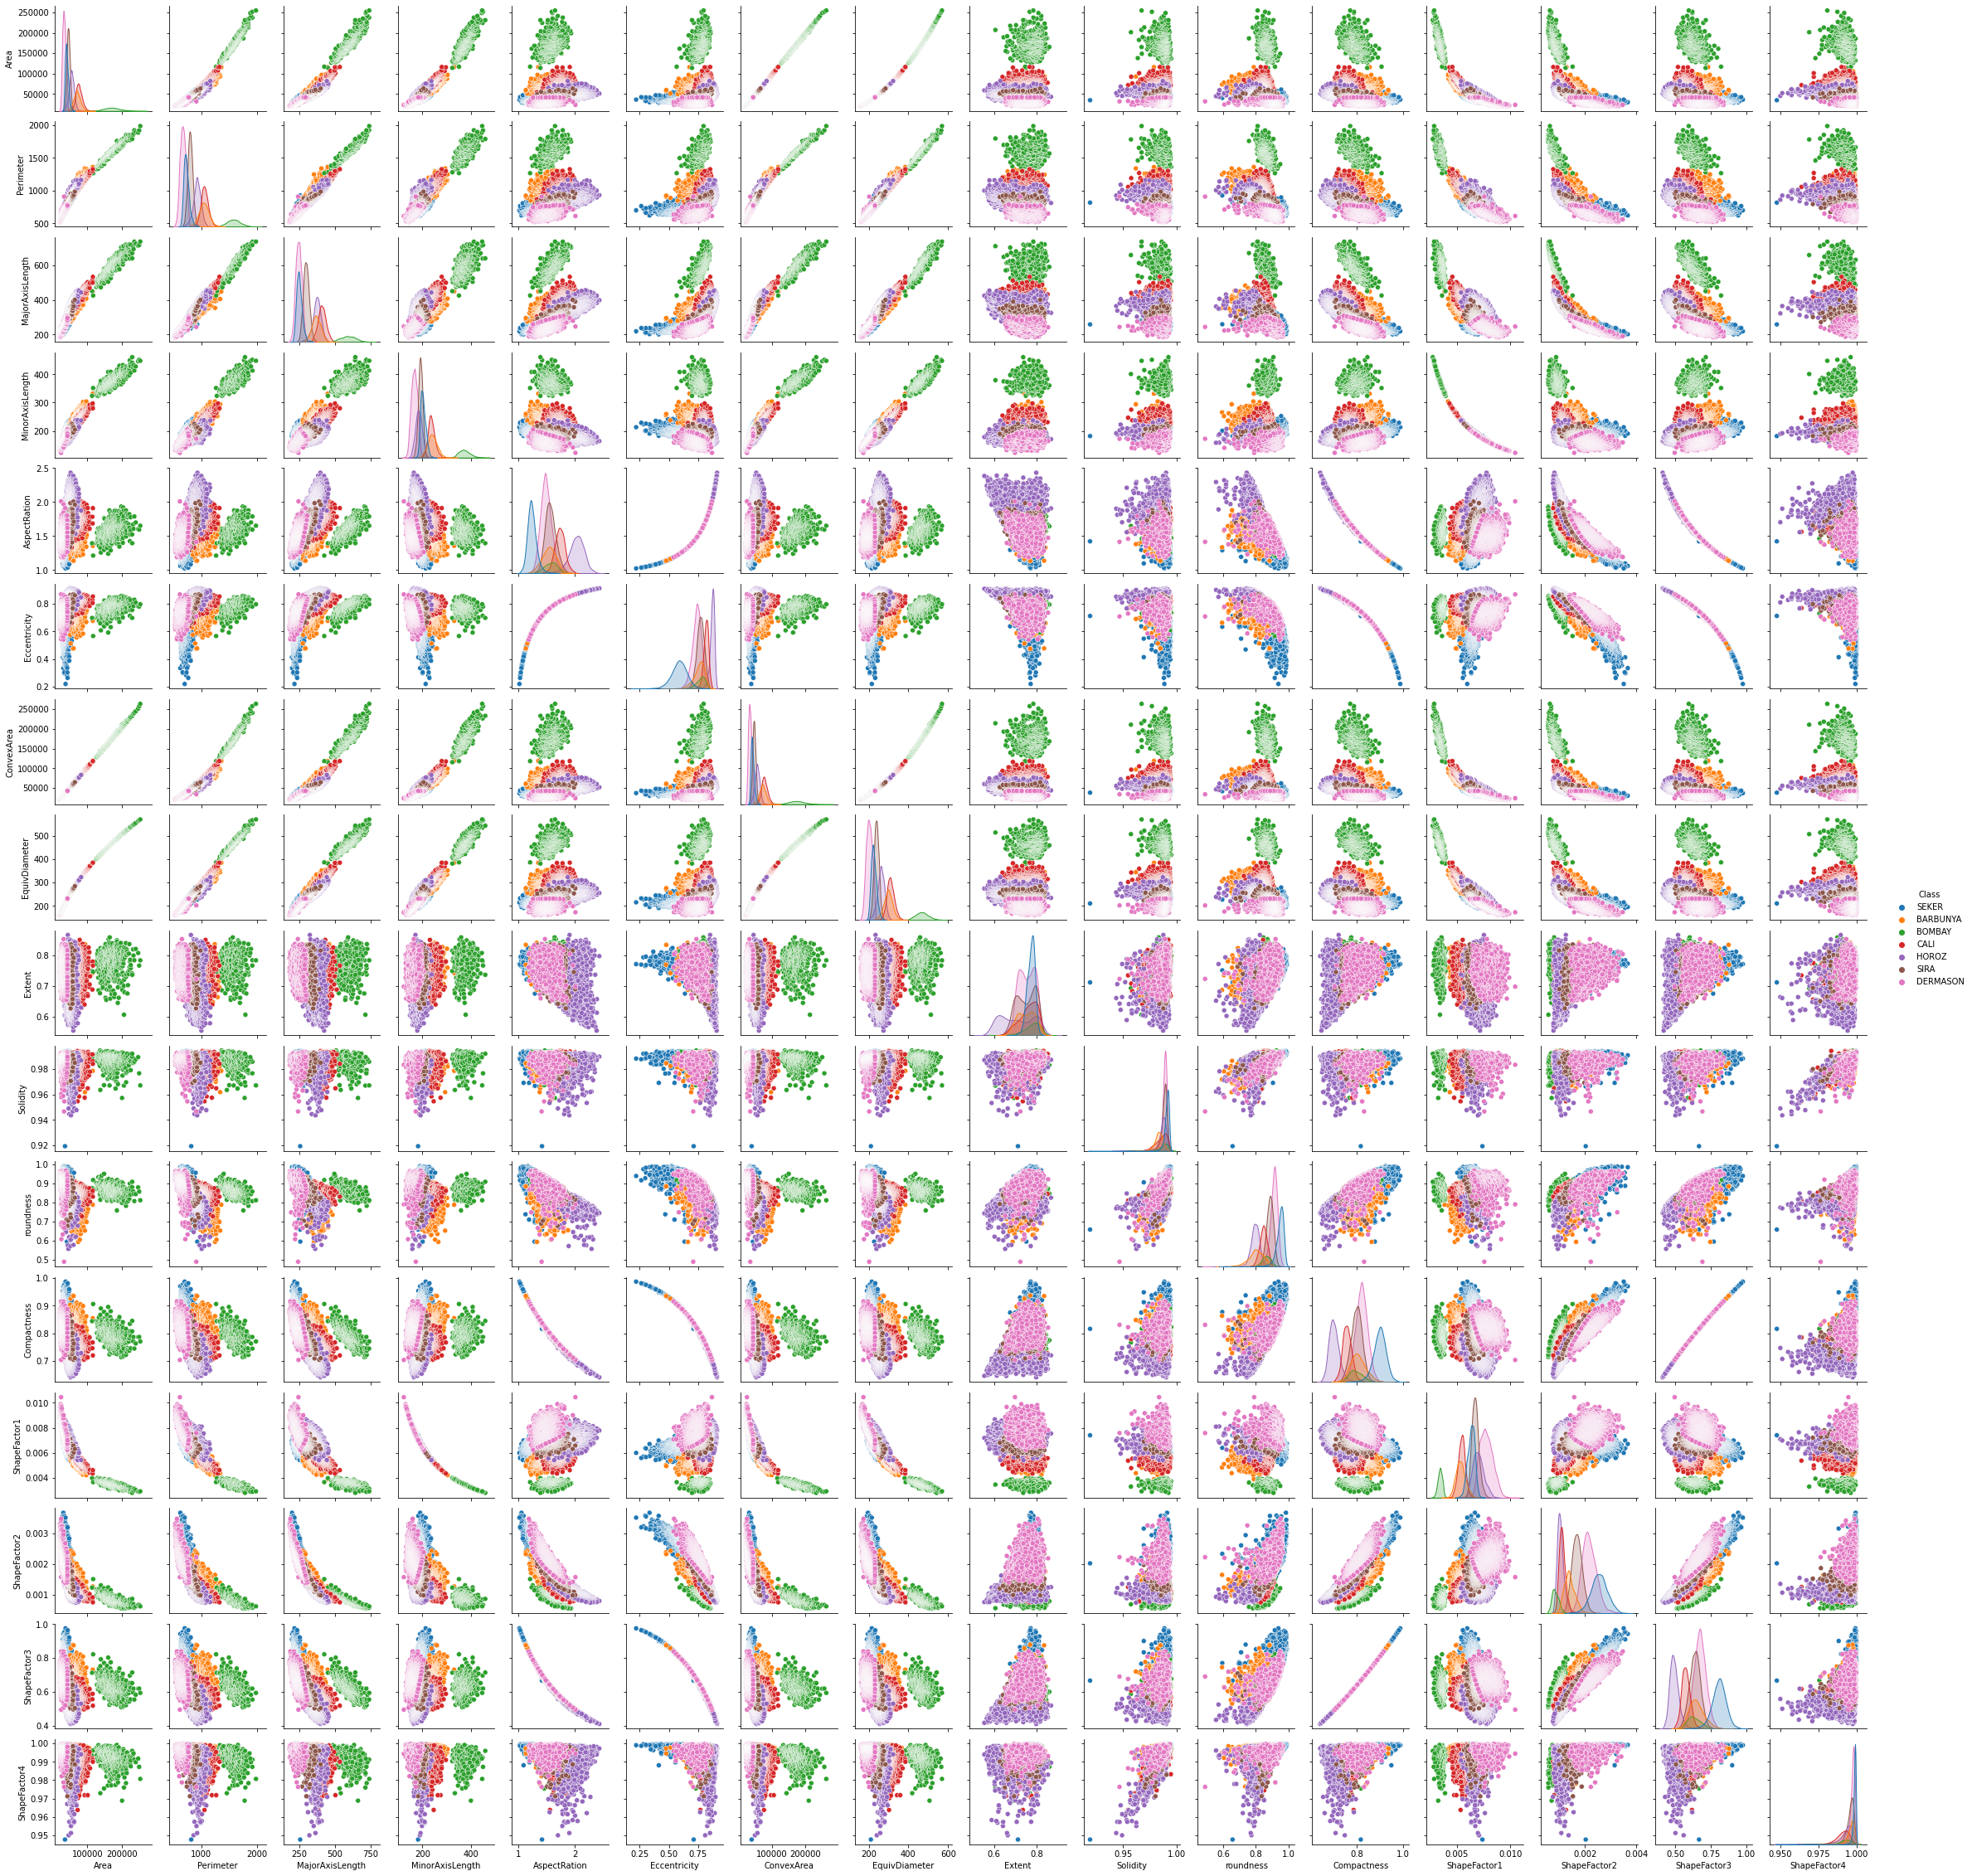

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.pairplot(df, hue='Class', height=2)

# **Part b**

**Insights-**

*   Area of most of the set lie in range 0 to 100000 (histplot)
*   Bombay has Maximum area and Dermason has minimum area (box plot)
*   Horoz has maximum eccentricity
*   eccentricity and AspectRation are strongly correlated with shapefactor3 (heatmap)
*   eccentricity and AspectRation are strongly correlated with compactness (heatmap)
*   equidiameter and convex area are weakly correlated (heatmap)
*   shapefactor2 has a lot of boundary/stray points(boxplot)









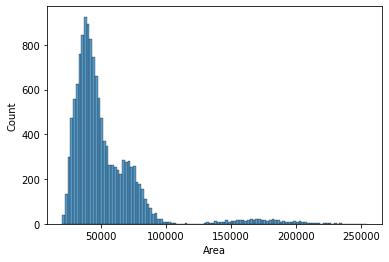

In [ ]:
sns.histplot(x='Area', data=df, )
plt.show()

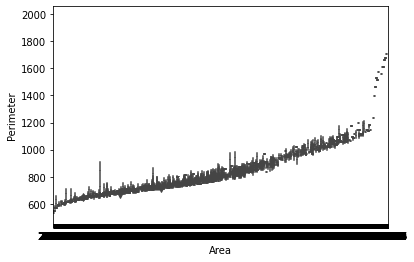

In [ ]:
sns.boxplot( x="Area", y='Perimeter', data=df, )
plt.show()
# violin plot 

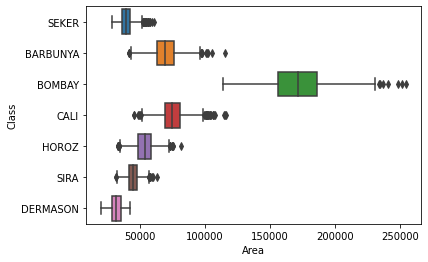

In [ ]:
sns.boxplot( x="Area", y='Class', data=df, )
plt.show()

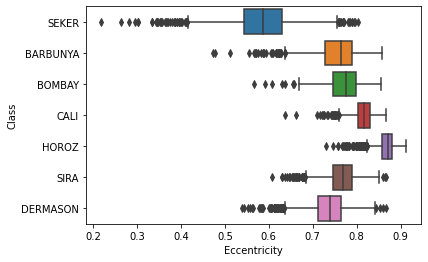

In [ ]:
sns.boxplot( x="Eccentricity", y='Class', data=df, )
plt.show()

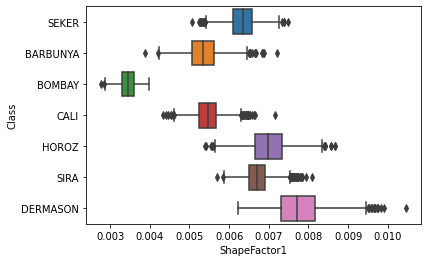

In [ ]:
sns.boxplot( x="ShapeFactor1", y='Class', data=df, )
plt.show()

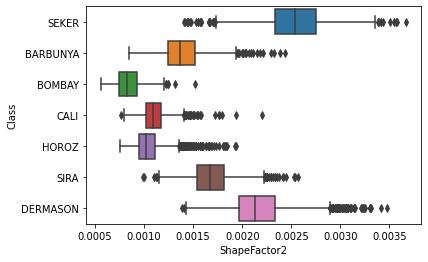

In [ ]:
sns.boxplot( x="ShapeFactor2", y='Class', data=df, )
plt.show()

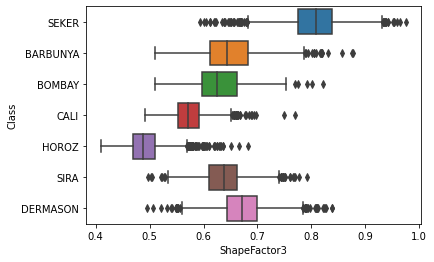

In [ ]:
sns.boxplot( x="ShapeFactor3", y='Class', data=df, )
plt.show()

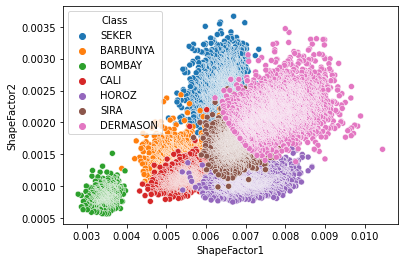

In [ ]:
sns.scatterplot( x="ShapeFactor1", y='ShapeFactor2', data=df,
                hue='Class')

In [14]:
X = df.iloc[:,0:16]

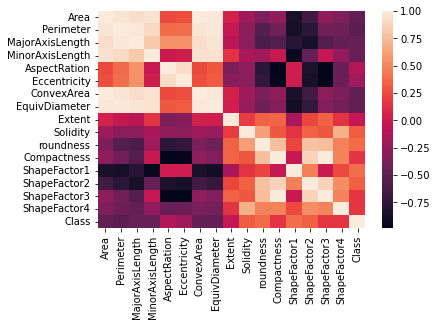

In [27]:
sns.heatmap(df_num.corr(method='pearson'))

**Checking for missing data -**

In [38]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [40]:
df.isnull().values.any()

False

# **Part c**

Data is pretty seperable at for distiguishing green red and orange however there are some merging points between blue pink brown and purple.

In [109]:
scalorX = StandardScaler().fit_transform(xd)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


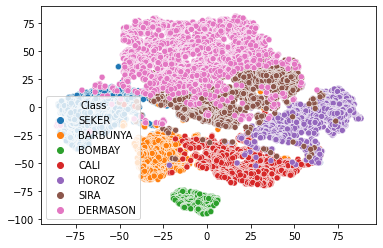

In [110]:
# Standardized data try 1
tsne_res = TSNE(n_components = 2).fit_transform(scalorX)
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = df['Class'], legend = 'full');

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13611 samples in 0.000s...
[t-SNE] Computed neighbors for 13611 samples in 4.668s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13611
[t-SNE] Computed conditional probabilities for sample 2000 / 13611
[t-SNE] Computed conditional probabilities for sample 3000 / 13611
[t-SNE] Computed conditional probabilities for sample 4000 / 13611
[t-SNE] Computed conditional probabilities for sample 5000 / 13611
[t-SNE] Computed conditional probabilities for sample 6000 / 13611
[t-SNE] Computed conditional probabilities for sample 7000 / 13611
[t-SNE] Computed conditional probabilities for sample 8000 / 13611
[t-SNE] Computed conditional probabilities for sample 9000 / 13611
[t-SNE] Computed conditional probabilities for sample 10000 / 13611
[t-SNE] Computed conditional probabilities for sample 11000 / 13611
[t-SNE] Computed conditional probabilities for sample 12000 / 13611
[t-SNE] Computed conditional probabilities for sa

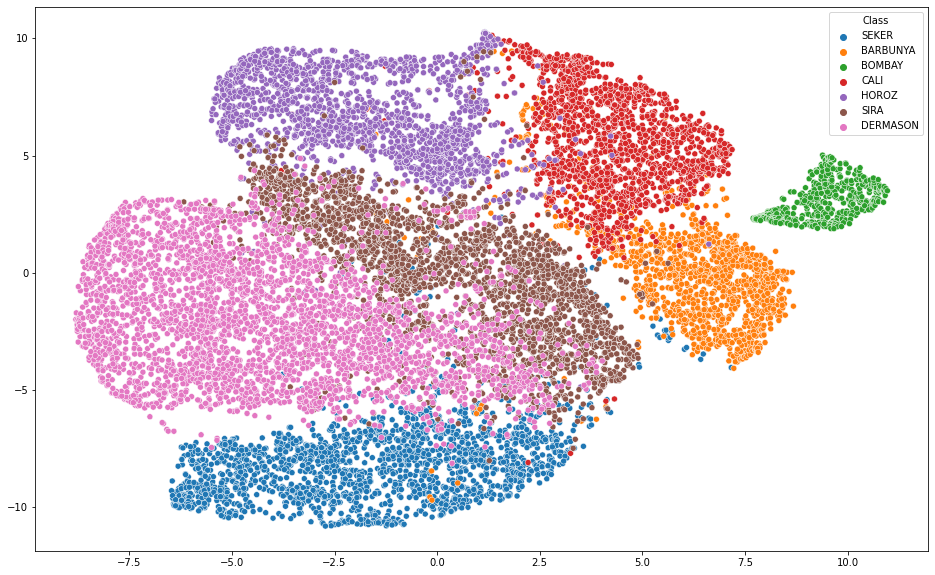

In [123]:
# Standardized data try 2
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scalorX)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x= tsne_results[:,0], y = tsne_results[:,1],
    hue= df['Class'],
    legend="full"
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13611 samples in 0.002s...
[t-SNE] Computed neighbors for 13611 samples in 6.095s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13611
[t-SNE] Computed conditional probabilities for sample 2000 / 13611
[t-SNE] Computed conditional probabilities for sample 3000 / 13611
[t-SNE] Computed conditional probabilities for sample 4000 / 13611
[t-SNE] Computed conditional probabilities for sample 5000 / 13611
[t-SNE] Computed conditional probabilities for sample 6000 / 13611
[t-SNE] Computed conditional probabilities for sample 7000 / 13611
[t-SNE] Computed conditional probabilities for sample 8000 / 13611
[t-SNE] Computed conditional probabilities for sample 9000 / 13611
[t-SNE] Computed conditional probabilities for sample 10000 / 13611
[t-SNE] Computed conditional probabilities for sample 11000 / 13611
[t-SNE] Computed conditional probabilities for sample 12000 / 13611
[t-SNE] Computed conditional probabilities for sa

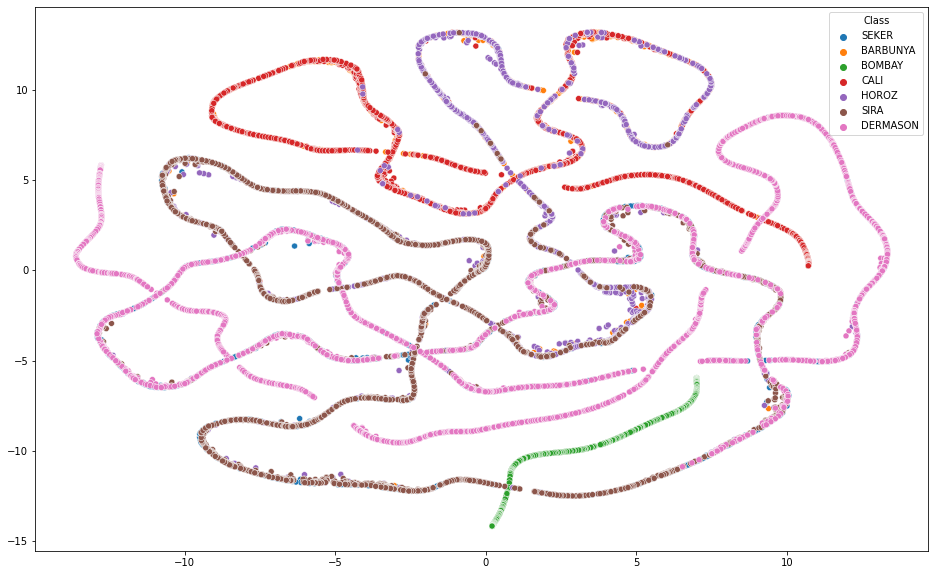

In [122]:
# Non Standardardized data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(xd)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x= tsne_results[:,0], y = tsne_results[:,1],
    hue= df['Class'],
    legend="full"
)

# **Part d**
(2 marks) Run the sklearn’s implementation of Naive Bayes (Any 2 of your choice refer here). Report Accuracy, Recall, and Precision. Comment on the results and
their differences from the two implementations of Naive Bayes. (80:20 train test
split)

In [46]:
# standardscalor to do feature scaling
scalorX = xd

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(scalorX, yd['Class'], test_size=0.2, random_state=100)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb.score(X_test, y_test)
print('Gaussian')
print('Accuracy in % :' ,gnb.score(X_test, y_test)*100)
print("precision in % : " ,metrics.precision_score(y_test, y_pred, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test, y_pred, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test, y_pred, average = "macro")*100)
print(metrics.classification_report(y_test , y_pred))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Gaussian
Accuracy in % : 77.12082262210797
precision in % :  77.28148416428769
recall score in % :  [ 48.59437751 100.          78.85304659  83.70165746  78.27225131
  73.58490566  77.87769784]
F1 score in % :  77.0235418829796
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       249
           1       0.99      1.00      1.00       109
           2       0.67      0.79      0.72       279
           3       0.87      0.84      0.85       724
           4       0.77      0.78      0.78       382
           5       0.69      0.74      0.71       424
           6       0.77      0.78      0.78       556

    accuracy                           0.77      2723
   macro avg       0.77      0.77      0.77      2723
weighted avg       0.77      0.77      0.77      2723

Number of mislabeled points out of a total 2723 points : 623


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(scalorX, yd['Class'], test_size=0.2, random_state=100)
gnb = BernoulliNB()
y_pred2 = gnb.fit(X_train2, y_train2).predict(X_test2)
gnb.score(X_test2, y_test2)
print('Bernoulli')
print('Accuracy in % :' ,gnb.score(X_test2, y_test2)*100)
print("precision in % : " ,metrics.precision_score(y_test2, y_pred2, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test2, y_pred2, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test2, y_pred2, average = "macro")*100)
print(metrics.classification_report(y_test2 , y_pred2))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test2 != y_pred2).sum()))

Bernoulli
Accuracy in % : 26.588321704002936
precision in % :  3.79833167200042
recall score in % :  [  0.   0.   0. 100.   0.   0.   0.]
F1 score in % :  6.001077541547516
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       249
           1       0.00      0.00      0.00       109
           2       0.00      0.00      0.00       279
           3       0.27      1.00      0.42       724
           4       0.00      0.00      0.00       382
           5       0.00      0.00      0.00       424
           6       0.00      0.00      0.00       556

    accuracy                           0.27      2723
   macro avg       0.04      0.14      0.06      2723
weighted avg       0.07      0.27      0.11      2723

Number of mislabeled points out of a total 2723 points : 1999


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

extra do not consider this

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train3 , X_test3 , y_train3 , y_test3 = train_test_split(xd, yd['Class'], test_size=0.2, random_state=100)
gnb = MultinomialNB()
y_pred3 = gnb.fit(X_train3, y_train3).predict(X_test3)
gnb.score(X_test3, y_test3)
print('Accuracy in % :' ,gnb.score(X_test2, y_test2)*100)
print("precision in % : " ,metrics.precision_score(y_test2, y_pred2, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test2, y_pred2, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test2, y_pred2, average = "macro")*100)
print(metrics.classification_report(y_test2 , y_pred2))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test2 != y_pred2).sum()))

Accuracy in % : 43.99559309585017
precision in % :  72.9443856422247
recall score in % :  [52.20883534 31.19266055 95.69892473 82.32044199 84.81675393 75.
 49.64028777]
F1 score in % :  67.60544516286181
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       249
           1       0.62      0.31      0.41       109
           2       0.54      0.96      0.69       279
           3       0.70      0.82      0.76       724
           4       0.86      0.85      0.86       382
           5       0.83      0.75      0.79       424
           6       0.65      0.50      0.56       556

    accuracy                           0.71      2723
   macro avg       0.73      0.67      0.68      2723
weighted avg       0.73      0.71      0.71      2723

Number of mislabeled points out of a total 2723 points : 778


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


# **Part e**
(3 marks) Use Principal Component Analysis (PCA) to reduce the number of fea-
tures and use the reduced data set for model training. Use values 4,6,8,10 and 12 for the number of components. Compare results (Accuracy, Precision, Recall, and F-1 score). (80:20 train test split)

In [35]:
# standardscalor to do feature scaling
scalorX = StandardScaler().fit_transform(xd) 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn import metrics

xxxx = StandardScaler().fit_transform(xd)
pca = PCA(n_components=4)
xxxx = pca.fit_transform(xxxx)

X_train, X_test, y_train, y_test = train_test_split(xxxx, yd['Class'], test_size=0.2, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print('Accuracy in % :' ,gnb.score(X_test, y_test)*100)
print("precision in % : " ,metrics.precision_score(y_test, y_pred, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test, y_pred, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test, y_pred, average = "macro")*100)
print(metrics.classification_report(y_test , y_pred))

Accuracy in % : 86.85273595299302
precision in % :  87.64428409786724
recall score in % :  [ 63.60153257 100.          85.17350158  88.07749627  95.09803922
  93.46246973  83.39552239]
F1 score in % :  87.15700076168197
              precision    recall  f1-score   support

           0       0.79      0.64      0.70       261
           1       1.00      1.00      1.00       117
           2       0.77      0.85      0.81       317
           3       0.88      0.88      0.88       671
           4       0.92      0.95      0.94       408
           5       0.96      0.93      0.95       413
           6       0.80      0.83      0.82       536

    accuracy                           0.87      2723
   macro avg       0.88      0.87      0.87      2723
weighted avg       0.87      0.87      0.87      2723



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

xxxx = StandardScaler().fit_transform(xd)
pca = PCA(n_components=6)
xxxx = pca.fit_transform(xxxx)

X_train, X_test, y_train, y_test = train_test_split(xxxx, yd['Class'], test_size=0.2, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb.score(X_test, y_test)
print('Accuracy in % :' ,gnb.score(X_test, y_test)*100)
print("precision in % : " ,metrics.precision_score(y_test, y_pred, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test, y_pred, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test, y_pred, average = "macro")*100)
print(metrics.classification_report(y_test , y_pred))

Accuracy in % : 90.08446566287184
precision in % :  91.80653717072276
recall score in % :  [ 89.27203065 100.          92.42902208  84.50074516  94.60784314
  93.22033898  88.05970149]
F1 score in % :  91.69060681216553
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       261
           1       1.00      1.00      1.00       117
           2       0.91      0.92      0.92       317
           3       0.93      0.85      0.88       671
           4       0.91      0.95      0.93       408
           5       0.96      0.93      0.95       413
           6       0.79      0.88      0.83       536

    accuracy                           0.90      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.90      0.90      0.90      2723



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

xxxx = StandardScaler().fit_transform(xd)
pca = PCA(n_components=8)
xxxx = pca.fit_transform(xxxx)

X_train, X_test, y_train, y_test = train_test_split(xxxx, yd['Class'], test_size=0.2, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb.score(X_test, y_test)
print('Accuracy in % :' ,gnb.score(X_test, y_test)*100)
print("precision in % : " ,metrics.precision_score(y_test, y_pred, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test, y_pred, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test, y_pred, average = "macro")*100)
print(metrics.classification_report(y_test , y_pred))

Accuracy in % : 90.01101726037459
precision in % :  92.12929864088301
recall score in % :  [ 88.12260536 100.          92.7444795   82.86140089  95.83333333
  91.52542373  90.48507463]
F1 score in % :  91.74247502595543
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       261
           1       1.00      1.00      1.00       117
           2       0.93      0.93      0.93       317
           3       0.93      0.83      0.87       671
           4       0.94      0.96      0.95       408
           5       0.99      0.92      0.95       413
           6       0.76      0.90      0.83       536

    accuracy                           0.90      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.90      0.90      2723



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

xxxx = StandardScaler().fit_transform(xd)
pca = PCA(n_components=10)
xxxx = pca.fit_transform(xxxx)

X_train, X_test, y_train, y_test = train_test_split(xxxx, yd['Class'], test_size=0.2, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb.score(X_test, y_test)
print('Accuracy in % :' ,gnb.score(X_test, y_test)*100)
print("precision in % : " ,metrics.precision_score(y_test, y_pred, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test, y_pred, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test, y_pred, average = "macro")*100)
print(metrics.classification_report(y_test , y_pred))

Accuracy in % : 89.34998163789938
precision in % :  91.84276397877117
recall score in % :  [ 87.7394636  100.          93.37539432  77.64530551  95.34313725
  92.25181598  93.28358209]
F1 score in % :  91.3358573778705
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       261
           1       1.00      1.00      1.00       117
           2       0.92      0.93      0.93       317
           3       0.93      0.78      0.85       671
           4       0.95      0.95      0.95       408
           5       0.98      0.92      0.95       413
           6       0.74      0.93      0.83       536

    accuracy                           0.89      2723
   macro avg       0.92      0.91      0.91      2723
weighted avg       0.90      0.89      0.89      2723



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

xxxx = StandardScaler().fit_transform(xd)
pca = PCA(n_components=12)
xxxx = pca.fit_transform(xxxx)

X_train, X_test, y_train, y_test = train_test_split(xxxx, yd['Class'], test_size=0.2, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb.score(X_test, y_test)
print('Accuracy in % :' ,gnb.score(X_test, y_test)*100)
print("precision in % : " ,metrics.precision_score(y_test, y_pred, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test, y_pred, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test, y_pred, average = "macro")*100)
print(metrics.classification_report(y_test , y_pred))

Accuracy in % : 89.68049944913699
precision in % :  91.94995724423755
recall score in % :  [ 85.05747126 100.          94.32176656  78.98658718  93.87254902
  93.94673123  93.84328358]
F1 score in % :  91.40900714063915
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       261
           1       1.00      1.00      1.00       117
           2       0.89      0.94      0.92       317
           3       0.94      0.79      0.86       671
           4       0.95      0.94      0.94       408
           5       0.98      0.94      0.96       413
           6       0.75      0.94      0.83       536

    accuracy                           0.90      2723
   macro avg       0.92      0.91      0.91      2723
weighted avg       0.91      0.90      0.90      2723



# **Part f**

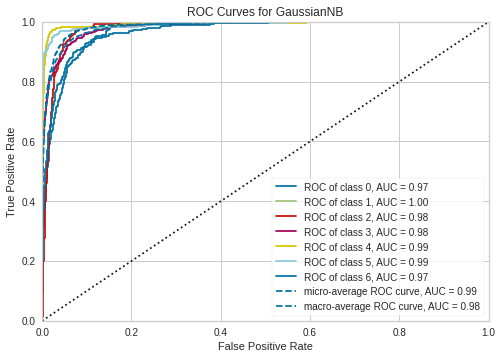

In [223]:
# standardized data

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

xxxx = StandardScaler().fit_transform(xd)
pca = PCA(n_components=2)
xxxx = pca.fit_transform(xxxx)

X_train, X_test, y_train, y_test = train_test_split(xxxx, yd['Class'], test_size=0.2, random_state=100)
gnb = GaussianNB()

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(gnb, classes=[0, 1, 2, 3 ,4, 5 ,6])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

try 2

# **Part g**
(2 marks) Train your model using Sklearn’s implementation of Logistic Regression,
choose appropriate parameters, and comment on your choice. Compare the results
with the ones obtained from Naive Bayes models. (80:20 train test split)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn import metrics

# SPLITTING TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(xd, yd['Class'], test_size = 0.25, random_state = 109)

# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=5 ,solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accurarcy - " , model.score(X_test,y_test)*100)
print("precision in % : " ,metrics.precision_score(y_test, y_pred, average = "macro")*100)
print("recall score in % : " ,metrics.recall_score(y_test, y_pred, average = None)*100)
print("F1 score in % : " ,metrics.f1_score(y_test, y_pred, average = "macro")*100)
print(metrics.classification_report(y_test , y_pred))

Accurarcy -  91.97766676461944
precision in % :  93.56905342752555
recall score in % :  [ 89.91825613 100.          96.25935162  91.87643021  94.06779661
  94.73684211  85.62874251]
F1 score in % :  93.3652004648678
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       367
           1       1.00      1.00      1.00       127
           2       0.92      0.96      0.94       401
           3       0.91      0.92      0.91       874
           4       0.96      0.94      0.95       472
           5       0.95      0.95      0.95       494
           6       0.85      0.86      0.85       668

    accuracy                           0.92      3403
   macro avg       0.94      0.93      0.93      3403
weighted avg       0.92      0.92      0.92      3403

